In [1]:
# Install libraries for support
# numpy, pandas, sklearn

In [2]:
# importing the libraries
import numpy as np
import pandas as pd

import os



for dirname, _, filenames in os.walk('./kaggle/input/'):
    for filename in filenames:
        print(f"{os.path.join(dirname, filename)}")

./kaggle/input/heart-disease-uci/heart.csv


In [4]:
df = pd.read_csv('kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,0:-1],
    df.iloc[:,-1],
    test_size=0.2,
    random_state=2
) 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier()

lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_predict_1 = lr.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy score of the Linear Regression: {accuracy_score(y_test, y_predict_1)}")



Accuracy score of the Linear Regression: 0.848780487804878


In [8]:
dtc.fit(X_train, y_train)
y_predict_2 = dtc.predict(X_test)

print(f"Accuracy score of the Decision Tree Classifer: {accuracy_score(y_test, y_predict_2)}")

Accuracy score of the Decision Tree Classifer: 0.9804878048780488


In [9]:

print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_predict_1))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_predict_2))


Confusion Matrix (Logistic Regression):
 [[81 24]
 [ 7 93]]

Confusion Matrix (Decision Tree):
 [[101   4]
 [  0 100]]


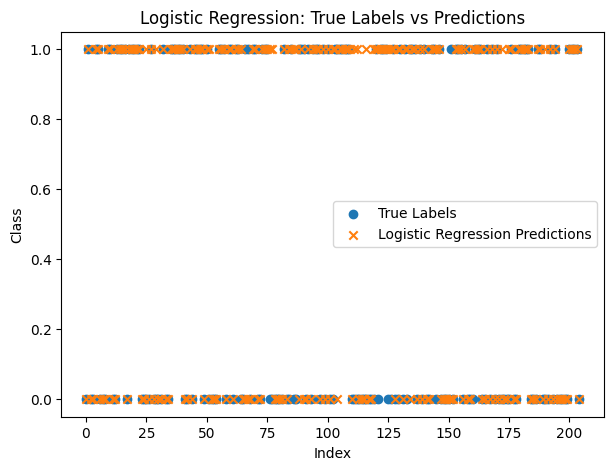

In [10]:
# For Logistic Regression

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(range(len(y_test)), y_test, label="True Labels")
plt.scatter(range(len(y_predict_1)), y_predict_1, label="Logistic Regression Predictions", marker='x')
plt.title("Logistic Regression: True Labels vs Predictions")
plt.xlabel("Index")
plt.ylabel("Class")
plt.legend()
plt.show()

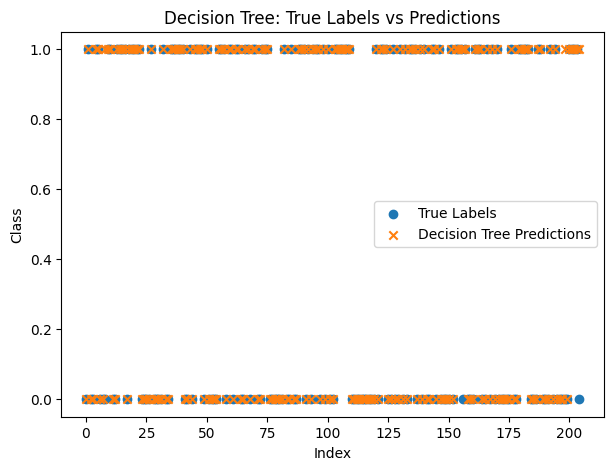

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(range(len(y_test)), y_test, label="True Labels")
plt.scatter(range(len(y_predict_2)), y_predict_2, label="Decision Tree Predictions", marker='x')
plt.title("Decision Tree: True Labels vs Predictions")
plt.xlabel("Index")
plt.ylabel("Class")
plt.legend()
plt.show()


In [14]:
# Logistic Regression for confusion matrix 

pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_predict_1), columns=list(range(0, 2)))

,0,1
0,81,24
1,7,93


In [15]:
# Decision Tree for confusion matrix

pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_predict_2), columns=list(range(0, 2)))

,0,1
0,101,4
1,0,100


In [16]:
# A Simple Prediction


result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_predict_1
result['Decision Tree Classifier Prediction'] = y_predict_2
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Classifier Prediction
886,0,0,0
440,0,1,0
197,1,1,1
917,1,1,1
991,0,0,0
384,0,0,0
811,0,1,0
871,1,1,1
273,0,0,1
179,0,0,0


In [18]:
# Precision, Recell, F1 Score

from sklearn.metrics import recall_score, precision_score, f1_score

print("For Logistic Regression")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_predict_1), columns=list(range(0, 2)))
print(cdf)
print("-"*50)
print(f"The the recell score: {recall_score(y_true=y_test, y_pred=y_predict_1)}")
print(f"The precision score: {precision_score(y_true=y_test, y_pred=y_predict_1)}")
print(f"The F1 score: {f1_score(y_true=y_test, y_pred=y_predict_1)}")
print("-"*50)

For Logistic Regression
--------------------------------------------------
    0   1
0  81  24
1   7  93
--------------------------------------------------
The the recell score: 0.93
The precision score: 0.7948717948717948
The F1 score: 0.8571428571428571
--------------------------------------------------


In [19]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_predict_2), columns=list(range(0, 2)))
print(cdf)
print("-"*50)
print(f"The the recell score: {recall_score(y_true=y_test, y_pred=y_predict_2)}")
print(f"The precision score: {precision_score(y_true=y_test, y_pred=y_predict_2)}")
print(f"The F1 score: {f1_score(y_true=y_test, y_pred=y_predict_2)}")
print("-"*50)

For DT Model
--------------------------------------------------
     0    1
0  101    4
1    0  100
--------------------------------------------------
The the recell score: 1.0
The precision score: 0.9615384615384616
The F1 score: 0.9803921568627451
--------------------------------------------------
